# Importations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [5]:
data = pd.read_parquet('data.parquet',engine='pyarrow')
print(data.shape)

rows_with_numbers = data[data['race'].str.contains(r'\d', regex=True)]
print(rows_with_numbers.shape)
data = data.drop(rows_with_numbers.index)
data.head()

(36513647, 7)
(40620, 7)


,player_id,guild,level,race,class,where,datetime
0,46340,53.0,26,Orc,Hunter,Razorfen Kraul,2007-06-12 03:17:48
1,31887,NaN,10,Orc,Hunter,Durotar,2007-06-12 03:17:48
2,47258,NaN,15,Orc,Warrior,The Barrens,2007-06-12 03:17:48
3,17448,NaN,43,Orc,Hunter,Silverpine Forest,2007-06-12 03:17:48
4,45159,104.0,57,Orc,Warlock,Winterspring,2007-06-12 03:17:53


In [12]:
data.sort_values(by="race")
uniquePlayerData=data.drop_duplicates(subset="player_id")
#uniquePlayerData = uniquePlayerData[uniquePlayerData["race"].str.isalpha()]
print(uniquePlayerData.shape)
print(uniquePlayerData["race"].unique())

character = uniquePlayerData["race"].astype(str)+" "+uniquePlayerData["class"].astype(str)

uniquePlayerData["character"] = character

uniquePlayerData.head()

(91059, 7)
['Orc', 'Tauren', 'Troll', 'Undead', 'Blood Elf']
Categories (10, object): ['Orc', 'Tauren', 'Troll', 'Undead', ..., '373族', '3033', '27410', '74622妖']


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,player_id,guild,level,race,class,where,datetime,character
0,46340,53.0,26,Orc,Hunter,Razorfen Kraul,2007-06-12 03:17:48,Orc Hunter
1,31887,NaN,10,Orc,Hunter,Durotar,2007-06-12 03:17:48,Orc Hunter
2,47258,NaN,15,Orc,Warrior,The Barrens,2007-06-12 03:17:48,Orc Warrior
3,17448,NaN,43,Orc,Hunter,Silverpine Forest,2007-06-12 03:17:48,Orc Hunter
4,45159,104.0,57,Orc,Warlock,Winterspring,2007-06-12 03:17:53,Orc Warlock


[28547 17781 16387 14285 14059     0     0     0     0     0]


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26063 (\N{CJK UNIFIED IDEOGRAPH-65CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22934 (\N{CJK UNIFIED IDEOGRAPH-5996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


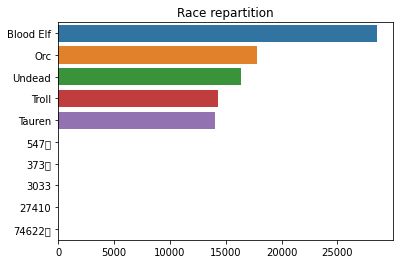

c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26063 (\N{CJK UNIFIED IDEOGRAPH-65CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22934 (\N{CJK UNIFIED IDEOGRAPH-5996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


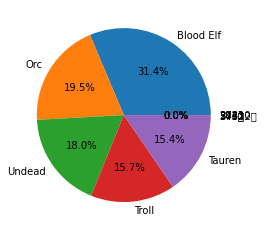

In [7]:
print(uniquePlayerData["race"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["race"].value_counts().index,x=uniquePlayerData["race"].value_counts().values,order = uniquePlayerData["race"].value_counts().index)
plt.title("Race repartition")
plt.show()

plt.pie(uniquePlayerData["race"].value_counts().values, labels = uniquePlayerData["race"].value_counts().index,autopct='%1.1f%%')
plt.plot("Pie chart of race repartition")
plt.show()

How to analyze this plot? First, we have to highlight a very surprising result: Orcs are the least played race (14% of players), even though they are the Horde main race. On the other side, Blood Elves are the most played race (25,8% of players, then more than a 4th), even though it is the newest race. 3rd and 4th races are Troll and Tauren, with only 0.1% player of difference.

What could be the reasons for this ranking? For the Blood Elves, the access to the Paladin class (see below) as well as their aesthetic may be a good explanation for them reaching the first place. Additionaly, their racial traits are good for the expansion's content, which makes this first place reasonable. <br/>

For the same reasons, Undeads (23.9%) are the second most played race. Indeed, their racial traits make the Undeads nice damage dealers.


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


[21381  7645  7584  7245  5365  4801  3960  3796   732     1     1     1
     0]


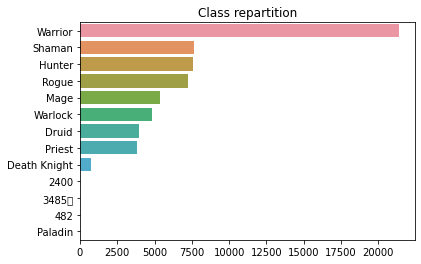

c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


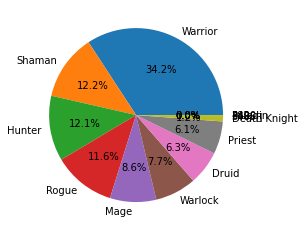

In [99]:
print(uniquePlayerData["class"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["class"].value_counts().index,x=uniquePlayerData["class"].value_counts().values,order = uniquePlayerData["class"].value_counts().index)
plt.title("Class repartition")
plt.show()

plt.pie(uniquePlayerData["class"].value_counts().values, labels = uniquePlayerData["class"].value_counts().index,autopct='%1.1f%%')
plt.plot("Pie chart of class repartition")
plt.show()

What do we learn by watching the class repartition? First, the most popular class is Warrior, which was predictable as it is the most basic class choice. It is most likely going to be the same on the Alliance side. Then, the least popular class is the Death Knight, which was also predictable, for two reasons: this is the latest class, added in the latest expansion (Wrath of the Lich King), and to create a Death Knight, the player has to have a character level 55 or above, which requires some playtime on another character. <br />

Now, let us take a look at some more technical results. The top 5 classes are damage dealer classes (known as DPS, for Damage Per Second), as player are more likely to play a damage dealing character instead of a tank or a healer. Even though Warrior have the Protection specialization (Tank) all the others (3 per classes, then 14 specializations) are DPS. This also explains why Priest (2 Healing specializations, 1 DPS) and Paladin (1 Healing specialization, 1 Tanking and 1 DPS) are a bit left behind. <br/>

One last question remains: why are Druid so rarely used? The answer lies in the class/race combination. Indeed, to create a Horde Druid in the game (in Wrath of the Lich King, there are new combinations available in the current version), you have to play a Tauren (and a Night Elf if you are playing for the Alliance). This restriction, coupled with the fact that the specializations are Healer/Tank/DPS, limits the number of players willing to play a Druid. However, this is the same with Paladin and Blood Elves, but the race graph shows that there are much more Blood Elves than Taurens, which makes Paladin a more played class than Druid (without considering that Paladin was one of the best classes back then).

c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


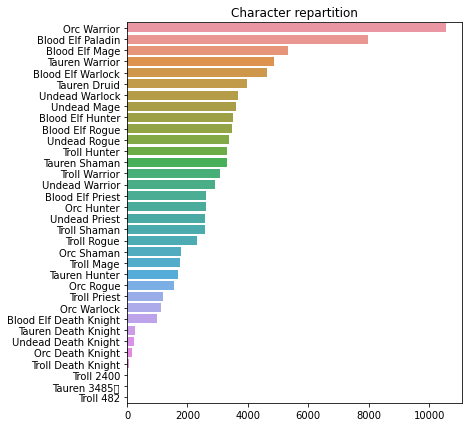

c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


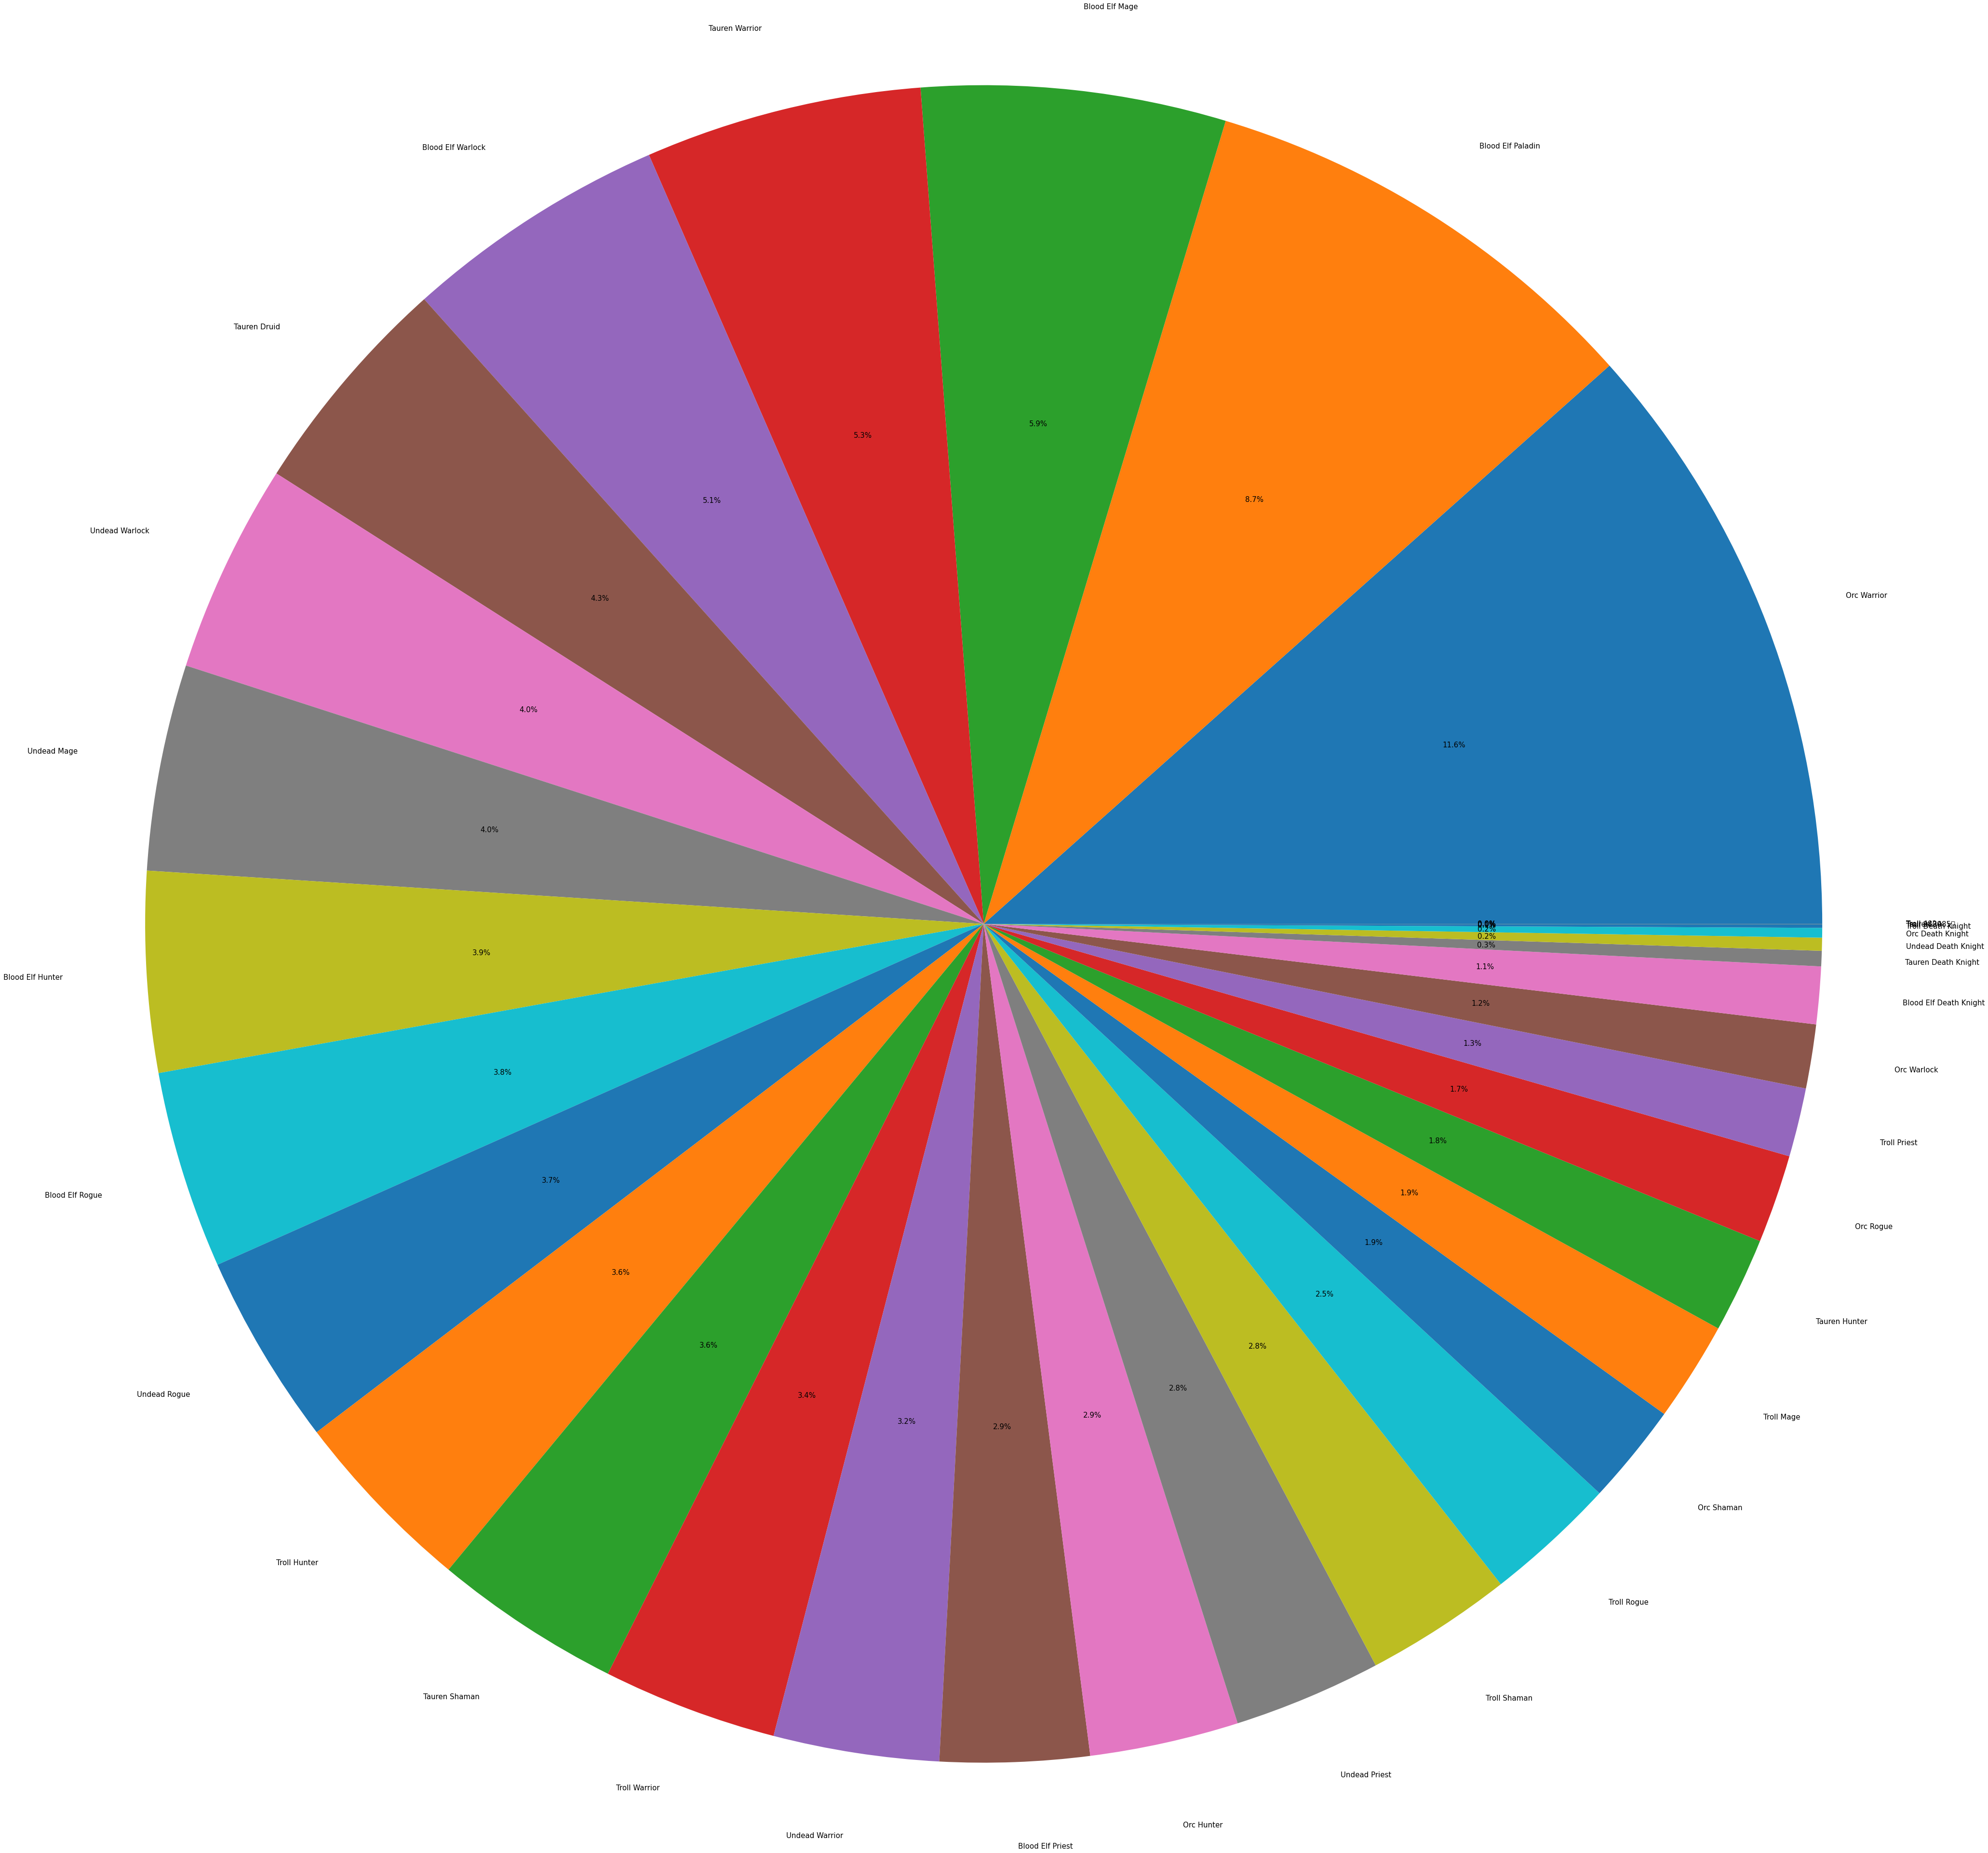

In [24]:
fig, ax = plt.subplots(figsize=(6, 7))
sns.barplot(uniquePlayerData,y=uniquePlayerData["character"].value_counts().index,x=uniquePlayerData["character"].value_counts().values,order = uniquePlayerData["character"].value_counts().index,ax=ax)
plt.title("Character repartition")
plt.show()

plt.pie(uniquePlayerData["character"].value_counts().values, labels = uniquePlayerData["character"].value_counts().index,autopct='%1.1f%%',radius=20,textprops={"fontsize":"50"})
plt.plot("Pie chart of character repartition")
plt.show()